<a href="https://colab.research.google.com/github/GustavsNolle/Flask-Web-App-Tutorial/blob/main/orange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

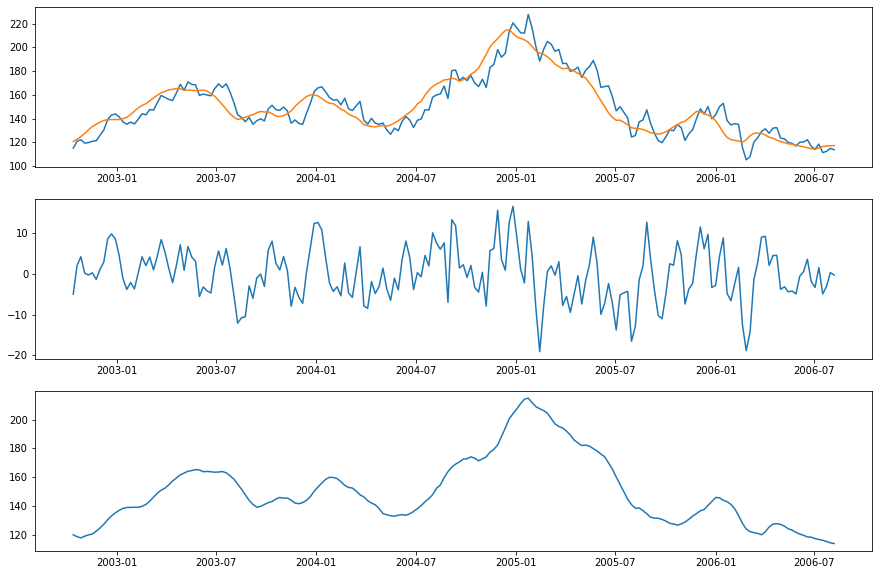

,Price,SMA,DPO,(-)DPO,Week
Price,1.000000,0.959322,0.183966,0.956858,-0.000848
SMA,0.959322,1.000000,0.111320,0.938521,0.005145
DPO,0.183966,0.111320,1.000000,0.029266,-0.018825
(-)DPO,0.956858,0.938521,0.029266,1.000000,0.009223
Week,-0.000848,0.005145,-0.018825,0.009223,1.000000


In [4]:
import numpy as np
import pandas as pd
file = open("orange.csv")
data = pd.read_csv(file, parse_dates=["Date"])
file.close()
data = data.iloc[::-1]
data1 = data.drop(['Open', 'High', 'Low', 'Vol.','Change %'], axis = 1)
data2 = data1['Price']
data1 = data1.drop(['Price'], axis = 1)
data3 = data2.to_numpy()
lis = []
sum = 0
#############
n = 8
#############
for x in range(n - 1):
  lis.append(0)
for x in range(n):
  sum = sum + data3[x]
  avg = sum / n
lis.append(avg)
y = 1
r = n - 1
try:
  while y == 1:
    r = r + 1
    sum = sum - data3[r - n] + data3[r]
    avg = sum / n
    lis.append(avg)
except IndexError:
  r = r - 1
data4 = np.append([data3], [lis], axis=0)
t = 1
nper = n%2
nper2 = n - nper
per = nper2/2 + 1
per = int(per)
s = n - 1 - per
s = int(s)
lis2 = []
lis3 = []
for p in range(int(s)):
  lis2.append(0)
  lis3.append(0)
try:
  while t == 1:
    val = data4[0][s] - data4[1][s + per]
    val2 = data4[1][s + per]
    lis2.append(val)
    lis3.append(val2)
    s = s + 1
except IndexError:
  for f in range(int(per)):
    lis2.append(0)
    lis3.append(0)
data5 = np.append(data4, [lis2, lis3], axis=0)
df = pd.DataFrame(data5.transpose(), columns = ['Price','SMA','DPO', '(-)DPO'])
import matplotlib.pyplot as plt

result = pd.concat([data1, df], axis=1)
df2 = result.T.drop_duplicates().T
#pd.set_option('display.max_rows', df.shape[0]+1)
#print(df2.head())
fig, bx = plt.subplots(3, figsize=(15, 10))
m = 1000
o = 800
bx[0].plot(df2["Date"][o:m], df2["Price"][o:m])
bx[0].plot(df2["Date"][o:m], df2["SMA"][o:m])
bx[1].plot(df2["Date"][o:m], df2["DPO"][o:m])
bx[2].plot(df2["Date"][o:m], df2["(-)DPO"][o:m])
plt.show()

cip = len(df2)%n
cip2 = len(df2) - cip
cip3 = cip2/n
nump = np.arange(n)
nump2 = nump.copy()
for e in range(int(cip3) - 1):
  nump2 = np.concatenate((nump2, nump))
nump2 = np.concatenate((nump2, np.arange(cip)))
df8 = pd.DataFrame(nump2.transpose(), columns = ['Week'])
df2 = pd.concat([df2, df8], axis=1)
df21 = df2.drop(['Date'], axis = 1)
df21 = df21.astype('float')
df21.corr()

In [2]:
d = {'J': [], 'F': [], 'M': [], 'A': [], 'MAY': [], 'JUN': [], 'JUL': [], 'AU': [], 'S': [], 'O': [], 'N': [], 'D': []}
df = pd.DataFrame(data=d)
l = 0
df2['month'] = pd.DatetimeIndex(df2['Date']).month
try:
  while l < 2553:
    if df2['month'][l] == 1:
      df = df.append({'J': df2['DPO'][l]}, ignore_index=True)
    elif df2['month'][l] == 2:
      df = df.append({'F': df2['DPO'][l]}, ignore_index=True)
    elif df2['month'][l] == 3:
      df = df.append({'M': df2['DPO'][l]}, ignore_index=True)
    elif df2['month'][l] == 4:
      df = df.append({'A': df2['DPO'][l]}, ignore_index=True)
    elif df2['month'][l] == 5:
      df = df.append({'MAY': df2['DPO'][l]}, ignore_index=True)
    elif df2['month'][l] == 6:
      df = df.append({'JUN': df2['DPO'][l]}, ignore_index=True)
    elif df2['month'][l] == 7:
      df = df.append({'JUL': df2['DPO'][l]}, ignore_index=True)
    elif df2['month'][l] == 8:
      df = df.append({'AU': df2['DPO'][l]}, ignore_index=True)
    elif df2['month'][l] == 9:
      df = df.append({'S': df2['DPO'][l]}, ignore_index=True)
    elif df2['month'][l] == 10:
      df = df.append({'O': df2['DPO'][l]}, ignore_index=True)
    elif df2['month'][l] == 11:
      df = df.append({'N': df2['DPO'][l]}, ignore_index=True)
    elif df2['month'][l] == 12:
      df = df.append({'D': df2['DPO'][l]}, ignore_index=True)
    l = l + 1
except (IndexError, ValueError) as e:
  l = l + 1
d = {'J': [df['J'].sum()], 'F': [df['F'].sum()], 'M': [df['M'].sum()], 'A': [df['A'].sum()], 
     'MAY': [df['MAY'].sum()], 'JUN': [df['JUN'].sum()], 'JUL': [df['JUL'].sum()], 'AU': [df['AU'].sum()], 
     'S': [df['S'].sum()], 'O': [df['O'].sum()], 'N': [df['N'].sum()], 'D': [df['D'].sum()]}
df = pd.DataFrame(data=d)
df

KeyError: ignored